## Part2 (二)季、月YoY營收成長率分析


In [206]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%config InlineBackend. figure_format = 'retina'

In [72]:
## 月營收變化YoY分析
month_profit = pd.read_csv('all_M_profit.csv')
month_profit = month_profit.sort_values('Month')
month_profit.reset_index(drop=True, inplace=True)
#incompar2 = []
#incompar2.append(month_profit_all[month_profit_all['Month']=='2019-11'])

In [3]:
month_profit

,Unnamed: 0,Year,Month,營收,成本,獲利
0,0,2016,2016-01,6.341658e+06,4281043.410,2060614.185
1,1,2016,2016-02,4.425430e+06,2737852.460,1687577.535
2,2,2016,2016-03,4.419311e+06,2605346.065,1813964.530
3,3,2016,2016-04,5.906345e+06,2837147.950,3069196.585
4,4,2016,2016-05,7.040271e+06,3354046.430,3686224.570
5,5,2016,2016-06,7.713770e+06,3850444.920,3863325.270
6,6,2016,2016-07,6.809492e+06,3423455.560,3386036.745
7,7,2016,2016-08,6.465510e+06,3257519.475,3207990.170
8,8,2016,2016-09,5.954097e+06,3203848.060,2750249.180
9,9,2016,2016-10,5.305048e+06,2827649.720,2477397.965


In [4]:
# 刪除2019-11資料
month_profit.drop(46, inplace=True)
month_profit.reset_index(drop=True, inplace=True)
month_profit['Month'] = month_profit['Month'].str.split('-', expand = True)[1]
month_profit

,Unnamed: 0,Year,Month,營收,成本,獲利
0,0,2016,01,6.341658e+06,4281043.410,2060614.185
1,1,2016,02,4.425430e+06,2737852.460,1687577.535
2,2,2016,03,4.419311e+06,2605346.065,1813964.530
3,3,2016,04,5.906345e+06,2837147.950,3069196.585
4,4,2016,05,7.040271e+06,3354046.430,3686224.570
5,5,2016,06,7.713770e+06,3850444.920,3863325.270
6,6,2016,07,6.809492e+06,3423455.560,3386036.745
7,7,2016,08,6.465510e+06,3257519.475,3207990.170
8,8,2016,09,5.954097e+06,3203848.060,2750249.180
9,9,2016,10,5.305048e+06,2827649.720,2477397.965


In [7]:
# 歷月獲利分析圖
fig_month_profit_all = px.line(month_profit,
                                 x='Month',
                                 y='獲利',
                                 color='Year') 
fig_month_profit_all.update_layout(
                #title={
                #    'text': '歷月獲利分析圖',
                #    'y':0.9,
                #    'x':0.5,
                #    'xanchor': 'center',
                #    'yanchor': 'top'},
                xaxis_title='月份',
                yaxis_title='獲利')
# fig_month_profit_18_19.write_html("./demo.html")   
fig_month_profit_all.show()
fig_month_profit_all = px.line(month_profit,
                                 x='Month',
                                 y='營收',
                                 color='Year') 

# 歷月營收分析圖
fig_month_profit_all.update_layout(
                #title={
                    #'text': '歷月營收分析圖',
                    #'y':0.9,
                    #'x':0.5,
                    #'xanchor': 'center',
                    #'yanchor': 'top'},
                xaxis_title='月份',
                yaxis_title='營收')
# fig_month_profit_18_19.write_html("./demo.html")   
fig_month_profit_all.show()

# 全部月份營收、成本、利潤折線圖 

In [355]:
# 全部月份營收折線圖
fig_month_revenue = px.line(month_profit, x = 'Month', y = '營收') #color = 'Year')
# 於notebook產出動態圖
fig_month_revenue.show()
#iplot(fig_month_profit)
#plot(fig_month_profit, filename = '各月利潤趨勢圖.html')

In [100]:
fig_month_cost = px.line(month_profit, x = 'Month', y = '成本') #color = 'Year')
# 於notebook產出動態圖
fig_month_cost.show()

In [101]:
fig_month_profit = px.line(month_profit, x = 'Month', y = '利潤') #color = 'Year')
# 於notebook產出動態圖
#iplot(fig_month_profit)
#plot(fig_month_profit, filename = '各月利潤趨勢圖.html')
fig_month_profit.show()

# month_profit_18_19 (2018年所有資料+2019年10月)

In [99]:
month_profit = pd.read_csv('all_M_profit.csv')

In [100]:
month_profit_18_19 = month_profit[month_profit['Year'] == 2018].append(month_profit[month_profit['Year'] == 2019])

C:\Users\chanm\AppData\Local\Temp\ipykernel_20148\2361863697.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [101]:
# 重設index
month_profit_18_19.reset_index(drop=True, inplace=True)
month_profit_18_19.drop('Unnamed: 0', axis=1, inplace=True)

In [102]:
month_profit_18_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    23 non-null     int64  
 1   Month   23 non-null     object 
 2   營收      23 non-null     float64
 3   成本      23 non-null     float64
 4   獲利      23 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.0+ KB


In [103]:
month_profit_18_19.to_csv('month_profit_18_19.csv')

# 1-10月營收波動狀況

In [126]:
# 僅取1-10月比較
profit_18_19_M1_10 = month_profit_18_19.drop(index=[10,11])
profit_18_19_M1_10 = profit_18_19_M1_10.reset_index(drop=True)

In [120]:
profit_18_19_M1_10

,Year,Month,營收,成本,獲利
0,2018,1,6321986,3231230,3090755
1,2018,2,6662085,3418726,3243359
2,2018,3,6150758,3086844,3063914
3,2018,4,7607202,3564494,4042707
4,2018,5,6696707,3091469,3605237
5,2018,6,5369112,2398071,2971041
6,2018,7,7785941,3823540,3962400
7,2018,8,6690657,3533407,3157250
8,2018,9,5672813,2672049,3000764
9,2018,10,7836798,3792919,4043878


In [121]:
# 了解數據波動狀況
# 計算標準差=營收與平均值的差距，了解數據波動狀況
import statistics as stats
# stats.stdev() 與stats.pstdev() 差別?
print('2018年營收標準差='+ str(round(stats.stdev(profit_18_19_M1_10[profit_18_19_M1_10['Year'] == 2018]['營收']))))
print('2019年營收標準差='+ str(round(stats.stdev(profit_18_19_M1_10[profit_18_19_M1_10['Year'] == 2019]['營收']))))

print('2018年營收標準差='+ str(round(stats.pstdev(profit_18_19_M1_10[profit_18_19_M1_10['Year'] == 2018]['營收']))))
print('2019年營收標準差='+ str(round(stats.pstdev(profit_18_19_M1_10[profit_18_19_M1_10['Year'] == 2019]['營收']))))

2018年營收標準差=853934
2019年營收標準差=2042005
2018年營收標準差=810113
2019年營收標準差=1937216


In [122]:
# 以標準差判斷月營業額和年營業額之間的差異程度，必須分別算出每個數據與平均值之間的差額
# 將差額平方後再相加，接著除以個數，最後開根號。
# 計算標準差=營收與平均值的差距，了解數據波動狀況
import statistics as stats
var = pd.DataFrame(columns=['std'],index=[2018, 2019]) 
a = stats.stdev( pd.DataFrame(profit_18_19_M1_10[profit_18_19_M1_10['Year'] == 2018]['營收']).reset_index(drop=True).astype(int)['營收'] ) 
b = stats.stdev( pd.DataFrame(profit_18_19_M1_10[profit_18_19_M1_10['Year'] == 2019]['營收']).reset_index(drop=True).astype(int)['營收'] )
var.loc[2018]=round(a)
var.loc[2019]=round(b)
var = var.astype(int)
var.loc['增減(%)'] = round(((var.loc[2019] - var.loc[2018])/var.loc[2018])*100, 1)

#var = var.transpose()
var 


,std
2018,853934.0
2019,2042005.0
增減(%),139.1


In [123]:
# 新增兩年各月mean
#rank = 0
#for Y in month_profit_18_19['Year'].unique():
var.loc[2018, 'mean'] = profit_18_19_M1_10[profit_18_19_M1_10['Year']== 2018]['營收'].mean()
var.loc[2019, 'mean'] = profit_18_19_M1_10[profit_18_19_M1_10['Year']== 2019]['營收'].mean()
var.loc['增減(%)', 'mean'] = round(((var.loc[2019, 'mean'] - var.loc[2018, 'mean'])/var.loc[2018, 'mean'])*100, 1)
var

,std,mean
2018,853934.0,6679405.9
2019,2042005.0,6232182.9
增減(%),139.1,-6.7


# 判斷各月營收是否低於當年平均值

In [133]:
profit_18_19_M1_10

,Year,Month,營收,成本,獲利,營收狀況
0,2018,1,6321986,3231230,3090755,NaN
1,2018,2,6662085,3418726,3243359,NaN
2,2018,3,6150758,3086844,3063914,NaN
3,2018,4,7607202,3564494,4042707,NaN
4,2018,5,6696707,3091469,3605237,NaN
5,2018,6,5369112,2398071,2971041,NaN
6,2018,7,7785941,3823540,3962400,NaN
7,2018,8,6690657,3533407,3157250,NaN
8,2018,9,5672813,2672049,3000764,NaN
9,2018,10,7836798,3792919,4043878,NaN


In [127]:
profit_18_19_M1_10['營收狀況'] = np.nan

In [134]:
tmp2018 = profit_18_19_M1_10[profit_18_19_M1_10['Year'] == 2018]
tmp2018

,Year,Month,營收,成本,獲利,營收狀況
0,2018,1,6321986,3231230,3090755,NaN
1,2018,2,6662085,3418726,3243359,NaN
2,2018,3,6150758,3086844,3063914,NaN
3,2018,4,7607202,3564494,4042707,NaN
4,2018,5,6696707,3091469,3605237,NaN
5,2018,6,5369112,2398071,2971041,NaN
6,2018,7,7785941,3823540,3962400,NaN
7,2018,8,6690657,3533407,3157250,NaN
8,2018,9,5672813,2672049,3000764,NaN
9,2018,10,7836798,3792919,4043878,NaN


In [135]:
rank=0
for i in tmp2018['Year']:
    if (tmp2018.iloc[rank,2] > (var.iloc[0,1]+var.iloc[0,0])).any():
        tmp2018.loc[rank, '營收狀況'] = '高於平均值'
    elif (tmp2018.iloc[rank,2] < (var.iloc[0,1]-var.iloc[0,0])).any():
        tmp2018.loc[rank, '營收狀況'] = '低於平均值'
    else:
        tmp2018.loc[rank, '營收狀況'] = '均值內'
    rank=rank+1
tmp2018

C:\Users\chanm\AppData\Local\Temp\ipykernel_29340\1737712225.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,營收,成本,獲利,營收狀況
0,2018,1,6321986,3231230,3090755,均值內
1,2018,2,6662085,3418726,3243359,均值內
2,2018,3,6150758,3086844,3063914,均值內
3,2018,4,7607202,3564494,4042707,高於平均值
4,2018,5,6696707,3091469,3605237,均值內
5,2018,6,5369112,2398071,2971041,低於平均值
6,2018,7,7785941,3823540,3962400,高於平均值
7,2018,8,6690657,3533407,3157250,均值內
8,2018,9,5672813,2672049,3000764,低於平均值
9,2018,10,7836798,3792919,4043878,高於平均值


In [136]:
tmp2018 = tmp2018[['Month', '營收', '營收狀況']]
tmp2018

,Month,營收,營收狀況
0,1,6321986,均值內
1,2,6662085,均值內
2,3,6150758,均值內
3,4,7607202,高於平均值
4,5,6696707,均值內
5,6,5369112,低於平均值
6,7,7785941,高於平均值
7,8,6690657,均值內
8,9,5672813,低於平均值
9,10,7836798,高於平均值


In [162]:
tmp2019 = profit_18_19_M1_10[profit_18_19_M1_10['Year'] == 2019]
tmp2019 = tmp2019.reset_index(drop=True)

In [163]:
rank=0
for i in tmp2019['Year']:
    if (tmp2019.iloc[rank,2] > (var.iloc[1,1]+var.iloc[1,0])).any():
        tmp2019.loc[rank, '營收狀況'] = '高於平均值'
    elif (tmp2019.iloc[rank,2] < (var.iloc[1,1]-var.iloc[1,0])).any():
        tmp2019.loc[rank, '營收狀況'] = '低於平均值'
    else:
        tmp2019.loc[rank, '營收狀況'] = '均值內'
    rank=rank+1
tmp2019

,Year,Month,營收,成本,獲利,營收狀況
0,2019,1,7380022,3726328,3653694,均值內
1,2019,2,5516570,2919350,2597219,均值內
2,2019,3,5270254,2675651,2594602,均值內
3,2019,4,7603548,3424904,4178643,均值內
4,2019,5,6222210,2912020,3310190,均值內
5,2019,6,5883092,2677987,3205104,均值內
6,2019,7,6222288,2807266,3415021,均值內
7,2019,8,4927288,2350744,2576543,均值內
8,2019,9,10567550,4703472,5864077,高於平均值
9,2019,10,2729007,1267781,1461225,低於平均值


In [164]:
# 合併兩表
tmp2019 = tmp2019[['Month', '營收', '營收狀況']]
tmp2019

,Month,營收,營收狀況
0,1,7380022,均值內
1,2,5516570,均值內
2,3,5270254,均值內
3,4,7603548,均值內
4,5,6222210,均值內
5,6,5883092,均值內
6,7,6222288,均值內
7,8,4927288,均值內
8,9,10567550,高於平均值
9,10,2729007,低於平均值


In [165]:
# 合併兩年資料
rev_status = pd.concat([tmp2018, tmp2019], axis = 1)
rev_status

,Month,營收,營收狀況,Month,營收,營收狀況
0,1,6321986,均值內,1,7380022,均值內
1,2,6662085,均值內,2,5516570,均值內
2,3,6150758,均值內,3,5270254,均值內
3,4,7607202,高於平均值,4,7603548,均值內
4,5,6696707,均值內,5,6222210,均值內
5,6,5369112,低於平均值,6,5883092,均值內
6,7,7785941,高於平均值,7,6222288,均值內
7,8,6690657,均值內,8,4927288,均值內
8,9,5672813,低於平均值,9,10567550,高於平均值
9,10,7836798,高於平均值,10,2729007,低於平均值


# 2018-19年銷售成長

In [166]:
tmp2019

,Month,營收,營收狀況
0,1,7380022,均值內
1,2,5516570,均值內
2,3,5270254,均值內
3,4,7603548,均值內
4,5,6222210,均值內
5,6,5883092,均值內
6,7,6222288,均值內
7,8,4927288,均值內
8,9,10567550,高於平均值
9,10,2729007,低於平均值


In [167]:
growth_rev_2019M = tmp2019
growth_rev_2019M

,Month,營收,營收狀況
0,1,7380022,均值內
1,2,5516570,均值內
2,3,5270254,均值內
3,4,7603548,均值內
4,5,6222210,均值內
5,6,5883092,均值內
6,7,6222288,均值內
7,8,4927288,均值內
8,9,10567550,高於平均值
9,10,2729007,低於平均值


In [168]:
growth_rev_2019M['較去年成長(%)'] = round(100*(growth_rev_2019M['營收']-tmp2018['營收'])/tmp2018['營收'], 1)
growth_rev_2019M

C:\Users\chanm\AppData\Local\Temp\ipykernel_29340\1543054197.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,營收,營收狀況,較去年成長(%)
0,1,7380022,均值內,16.7
1,2,5516570,均值內,-17.2
2,3,5270254,均值內,-14.3
3,4,7603548,均值內,-0.0
4,5,6222210,均值內,-7.1
5,6,5883092,均值內,9.6
6,7,6222288,均值內,-20.1
7,8,4927288,均值內,-26.4
8,9,10567550,高於平均值,86.3
9,10,2729007,低於平均值,-65.2


In [170]:
growth_rev_2019M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     10 non-null     int32  
 1   營收        10 non-null     int32  
 2   營收狀況      10 non-null     object 
 3   較去年成長(%)  10 non-null     float64
dtypes: float64(1), int32(2), object(1)
memory usage: 368.0+ bytes


In [176]:
growth_rev_2019M['較去年成長(%)'] <0

0    False
1     True
2     True
3    False
4     True
5    False
6     True
7     True
8    False
9     True
Name: 較去年成長(%), dtype: bool

In [194]:
#growth_2019M['正負'] = 
#fill =[]
for i in growth_rev_2019M['較去年成長(%)']:
    if (growth_rev_2019M['較去年成長(%)'] > 0).any(): 
        print('正成長')
    else: #(growth_2019M['較去年成長(%)'] < 0):
        print('負成長')


正成長
正成長
正成長
正成長
正成長
正成長
正成長
正成長
正成長
正成長


In [154]:
fig_growth_rev_2019M = px.bar(growth_rev_2019M, x='Month', y='較去年成長(%)')
fig_growth_rev_2019M.show()
# 加工 顯示數字 顏色區別?

# 2018-19年利潤成長

In [39]:
month_profit_18_19 = pd.read_csv('month_profit_18_19.csv')
month_profit_18_19=month_profit_18_19.drop('Unnamed: 0',axis=1)

In [40]:
month_profit_18_19

,Year,Month,營收,成本,獲利
0,2018,1,6321986,3231230,3090755
1,2018,2,6662085,3418726,3243359
2,2018,3,6150758,3086844,3063914
3,2018,4,7607202,3564494,4042707
4,2018,5,6696707,3091469,3605237
5,2018,6,5369112,2398071,2971041
6,2018,7,7785941,3823540,3962400
7,2018,8,6690657,3533407,3157250
8,2018,9,5672813,2672049,3000764
9,2018,10,7836798,3792919,4043878


In [ ]:
# 繪圖前先將Month改為月份: str.split()
#month_profit_18_19['Month'] = month_profit_18_19['Month'].str.split('-', expand = True)[1]

In [4]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig_month_profit_18_19 = px.line(month_profit_18_19,
                                 x='Month',
                                 y='獲利',
                                 color='Year')
# 調整元素:標題、顯示各月數值 
fig_month_profit_18_19.update_layout(
                title={
                    'text': '2018-19年利潤比較折線圖',
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                xaxis_title='月份',
                yaxis_title='獲利')
# fig_month_profit_18_19.write_html("./demo.html")   
fig_month_profit_18_19.show()                         

In [41]:
growth_profit_2018M = month_profit_18_19[month_profit_18_19['Year'] == 2018]
growth_profit_2019M = month_profit_18_19[month_profit_18_19['Year'] == 2019]

In [42]:
growth_profit_2018M.drop([10,11], inplace=True)
growth_profit_2018M

C:\Users\chanm\AppData\Local\Temp\ipykernel_20148\371016646.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,營收,成本,獲利
0,2018,1,6321986,3231230,3090755
1,2018,2,6662085,3418726,3243359
2,2018,3,6150758,3086844,3063914
3,2018,4,7607202,3564494,4042707
4,2018,5,6696707,3091469,3605237
5,2018,6,5369112,2398071,2971041
6,2018,7,7785941,3823540,3962400
7,2018,8,6690657,3533407,3157250
8,2018,9,5672813,2672049,3000764
9,2018,10,7836798,3792919,4043878


In [43]:
growth_profit_2019M.reset_index(drop=True, inplace=True)
growth_profit_2019M

,Year,Month,營收,成本,獲利
0,2019,1,7380022,3726328,3653694
1,2019,2,5516570,2919350,2597219
2,2019,3,5270254,2675651,2594602
3,2019,4,7603548,3424904,4178643
4,2019,5,6222210,2912020,3310190
5,2019,6,5883092,2677987,3205104
6,2019,7,6222288,2807266,3415021
7,2019,8,4927288,2350744,2576543
8,2019,9,10567550,4703472,5864077
9,2019,10,2729007,1267781,1461225


In [44]:
growth_profit_2019M['獲利成長%'] = round(100*((growth_profit_2019M['獲利'] - growth_profit_2018M['獲利'])/growth_profit_2018M['獲利']), 1)

C:\Users\chanm\AppData\Local\Temp\ipykernel_20148\3635197665.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
growth_profit_2019M#['獲利成長%'].sum()

,Year,Month,營收,成本,獲利,獲利成長%
0,2019,1,7380022,3726328,3653694,18.2
1,2019,2,5516570,2919350,2597219,-19.9
2,2019,3,5270254,2675651,2594602,-15.3
3,2019,4,7603548,3424904,4178643,3.4
4,2019,5,6222210,2912020,3310190,-8.2
5,2019,6,5883092,2677987,3205104,7.9
6,2019,7,6222288,2807266,3415021,-13.8
7,2019,8,4927288,2350744,2576543,-18.4
8,2019,9,10567550,4703472,5864077,95.4
9,2019,10,2729007,1267781,1461225,-63.9


# 18_19總獲利成長率YoY

In [48]:
month_profit_18_19

,Year,Month,營收,成本,獲利
0,2018,1,6321986,3231230,3090755
1,2018,2,6662085,3418726,3243359
2,2018,3,6150758,3086844,3063914
3,2018,4,7607202,3564494,4042707
4,2018,5,6696707,3091469,3605237
5,2018,6,5369112,2398071,2971041
6,2018,7,7785941,3823540,3962400
7,2018,8,6690657,3533407,3157250
8,2018,9,5672813,2672049,3000764
9,2018,10,7836798,3792919,4043878


In [49]:
month_profit_18_19.drop([10,11], inplace=True)

In [50]:
# 利潤成長率(YoY)
growth18_19 = month_profit_18_19.groupby('Year', as_index=False)['獲利'].sum()
growth18_19

,Year,獲利
0,2018,34181305
1,2019,32856318


In [53]:

# 上下行計算 .shift(-1)
growth18_19['total_growth'] = round(((growth18_19['獲利'] - growth18_19['獲利'].shift(1))/growth18_19.iloc[0,1])*100, 1)
growth18_19

,Year,獲利,total_growth
0,2018,34181305,NaN
1,2019,32856318,-3.9


In [54]:
growth18_19.iloc[1,2]

-3.9

In [56]:
print('2019年利潤成長率(YoY):' + str(growth18_19.iloc[1,2]) + '%')

2019年利潤成長率(YoY):-3.9%


# 季獲利比較YoY

In [111]:
month_profit_18_19 = pd.read_csv('month_profit_18_19.csv')
month_profit_18_19

,Unnamed: 0,Year,Month,營收,成本,獲利
0,0,2018,2018-01,6.321987e+06,3231230.730,3090755.955
1,1,2018,2018-02,6.662086e+06,3418726.185,3243359.315
2,2,2018,2018-03,6.150759e+06,3086844.145,3063914.490
3,3,2018,2018-04,7.607202e+06,3564494.570,4042707.585
4,4,2018,2018-05,6.696708e+06,3091469.885,3605237.930
5,5,2018,2018-06,5.369112e+06,2398071.130,2971041.080
6,6,2018,2018-07,7.785941e+06,3823540.945,3962400.330
7,7,2018,2018-08,6.690658e+06,3533407.360,3157250.145
8,8,2018,2018-09,5.672814e+06,2672049.170,3000764.585
9,9,2018,2018-10,7.836798e+06,3792919.270,4043878.825


In [112]:
month_profit_18_19['date'] = pd.to_datetime(month_profit_18_19['Month'])

In [113]:
month_profit_18_19

,Unnamed: 0,Year,Month,營收,成本,獲利,date
0,0,2018,2018-01,6.321987e+06,3231230.730,3090755.955,2018-01-01
1,1,2018,2018-02,6.662086e+06,3418726.185,3243359.315,2018-02-01
2,2,2018,2018-03,6.150759e+06,3086844.145,3063914.490,2018-03-01
3,3,2018,2018-04,7.607202e+06,3564494.570,4042707.585,2018-04-01
4,4,2018,2018-05,6.696708e+06,3091469.885,3605237.930,2018-05-01
5,5,2018,2018-06,5.369112e+06,2398071.130,2971041.080,2018-06-01
6,6,2018,2018-07,7.785941e+06,3823540.945,3962400.330,2018-07-01
7,7,2018,2018-08,6.690658e+06,3533407.360,3157250.145,2018-08-01
8,8,2018,2018-09,5.672814e+06,2672049.170,3000764.585,2018-09-01
9,9,2018,2018-10,7.836798e+06,3792919.270,4043878.825,2018-10-01


In [114]:
# 新增一欄'quarter'
month_profit_18_19['quarter'] = month_profit_18_19['date'].dt.to_period('Q')
month_profit_18_19['quarter']  = month_profit_18_19['quarter'].dt.strftime('q%q')
month_profit_18_19

,Unnamed: 0,Year,Month,營收,成本,獲利,date,quarter
0,0,2018,2018-01,6.321987e+06,3231230.730,3090755.955,2018-01-01,q1
1,1,2018,2018-02,6.662086e+06,3418726.185,3243359.315,2018-02-01,q1
2,2,2018,2018-03,6.150759e+06,3086844.145,3063914.490,2018-03-01,q1
3,3,2018,2018-04,7.607202e+06,3564494.570,4042707.585,2018-04-01,q2
4,4,2018,2018-05,6.696708e+06,3091469.885,3605237.930,2018-05-01,q2
5,5,2018,2018-06,5.369112e+06,2398071.130,2971041.080,2018-06-01,q2
6,6,2018,2018-07,7.785941e+06,3823540.945,3962400.330,2018-07-01,q3
7,7,2018,2018-08,6.690658e+06,3533407.360,3157250.145,2018-08-01,q3
8,8,2018,2018-09,5.672814e+06,2672049.170,3000764.585,2018-09-01,q3
9,9,2018,2018-10,7.836798e+06,3792919.270,4043878.825,2018-10-01,q4


In [115]:
month_profit_18_19.drop([22], inplace=True)

In [116]:
# 季營收變化YoY
q_18_19_compar = month_profit_18_19.groupby(['Year', 'quarter'], as_index=False)['營收', '成本', '獲利'].sum()
q_18_19_compar

C:\Users\chanm\AppData\Local\Temp\ipykernel_20148\1442696851.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,quarter,營收,成本,獲利
0,2018,q1,1.913483e+07,9.736801e+06,9.398030e+06
1,2018,q2,1.967302e+07,9.054036e+06,1.061899e+07
2,2018,q3,2.014941e+07,1.002900e+07,1.012042e+07
3,2018,q4,2.682544e+07,1.310306e+07,1.372238e+07
4,2019,q1,1.816685e+07,9.321330e+06,8.845517e+06
5,2019,q2,1.970885e+07,9.014913e+06,1.069394e+07
6,2019,q3,2.171713e+07,9.861484e+06,1.185564e+07
7,2019,q4,2.729007e+06,1.267782e+06,1.461226e+06


In [119]:
q_18_19_compar[['營收',	'成本', '獲利']] = q_18_19_compar[['營收',	'成本', '獲利']].astype(int)

In [59]:
q_18_19_compar['同年累積利潤'] = np.nan
q_18_19_compar['同年累積利潤'].iloc[0:4] = q_18_19_compar['利潤'].iloc[0:4].cumsum()
q_18_19_compar['同年累積利潤'].iloc[4:8] = q_18_19_compar['利潤'].iloc[4:8].cumsum()

C:\Users\chanm\AppData\Local\Temp\ipykernel_9004\3006917299.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chanm\AppData\Local\Temp\ipykernel_9004\3006917299.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
print('2019年獲利相較2018年還少:' + str(q_18_19_compar['獲利'].iloc[0:4].sum() - q_18_19_compar['獲利'].iloc[4:8].sum()))
#2019年獲利相較2018年還少:11003488.899999995

2019年獲利相較2018年還少:11003488


# 相較同季獲利成長

In [161]:
q_18_19_compar

,Year,quarter,營收,成本,獲利
0,2018,q1,19134830,9736801,9398029
1,2018,q2,19673022,9054035,10618986
2,2018,q3,20149412,10028997,10120415
3,2018,q4,26825439,13103056,13722382
4,2019,q1,18166847,9321329,8845517
5,2019,q2,19708851,9014912,10693939
6,2019,q3,21717127,9861483,11855643
7,2019,q4,2729007,1267781,1461225


In [188]:
q_18_19_growth = []
for quarter in q_18_19_compar['quarter'].astype(str):
    #rank = 1 
    tmp_compar = q_18_19_compar[q_18_19_compar['quarter'] == quarter ]
    tmp_compar['growth'] = round((( tmp_compar ['獲利'] - tmp_compar ['獲利'].shift(1) )/tmp_compar ['獲利'].shift(1))*100, 1)
    tmp_compar = str(tmp_compar.iloc[1,5])
    q_18_19_growth.append(tmp_compar)
    

C:\Users\chanm\AppData\Local\Temp\ipykernel_20148\4043305336.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chanm\AppData\Local\Temp\ipykernel_20148\4043305336.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chanm\AppData\Local\Temp\ipykernel_20148\4043305336.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [189]:
q_18_19_growth

['-5.9', '0.7', '17.1', '-89.4', '-5.9', '0.7', '17.1', '-89.4']

In [190]:
q_18_19_growth = q_18_19_growth[0:4]
q_18_19_growth = pd.DataFrame(q_18_19_growth)
q_18_19_growth


,0
0,-5.9
1,0.7
2,17.1
3,-89.4


In [191]:
q_18_19_growth['季'] = range(1, 5)
q_18_19_growth = q_18_19_growth.rename(columns={0:'成長率'})
q_18_19_growth = q_18_19_growth[['季', '成長率']]

In [192]:
q_18_19_growth

,季,成長率
0,1,-5.9
1,2,0.7
2,3,17.1
3,4,-89.4



# 利潤季度與利潤累積折線圖

In [633]:
q_18_19_compar

,Year,quarter,營收,成本,獲利
0,2018,q1,19134830,9736801,9398029
1,2018,q2,19673022,9054035,10618986
2,2018,q3,20149412,10028997,10120415
3,2018,q4,26825439,13103056,13722382
4,2019,q1,18166847,9321329,8845517
5,2019,q2,19708851,9014912,10693939
6,2019,q3,21717127,9861483,11855643
7,2019,q4,2729007,1267781,1461225


In [194]:
fig_q_18_19_compar = px.histogram(q_18_19_compar,
                        x='quarter',
                        y='獲利',
                        color='Year',
                        barmode='group')
fig_q_18_19_compar.update_layout(
                title={
                    'text': '利潤季度YoY比較',
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                xaxis_title='季',
                yaxis_title='獲利')
#fig_q_18_19_compar.add_scatter(x=q_18_19_compar['quarter'], y=q_18_19_compar['同年累積利潤'][0:4], mode="lines", name ='2018年累積利潤', line=dict(color="royalblue"))
#fig_q_18_19_compar.add_scatter(x=q_18_19_compar['quarter'], y=q_18_19_compar['同年累積利潤'][4:8], mode="lines", name ='2019年累積利潤', line=dict(color="red"))
#fig_q_compar.update_layout(barmode='overlay')
#fig_q_compar.update_traces(opacity=0.75)

# fig_month_profit_18_19.write_html("./demo.html")   
fig_q_18_19_compar.show()   

# 利潤折線與利潤累積圖

In [618]:
asda = pd.read_csv('new_all_data.csv')
asda = asda [ asda['Month']=='2019-11' ]
asda

,Unnamed: 0,顏色,單價,成本,系列,產品,訂單時間,會員,性別,年紀,廣告代號all,尺寸,Year,Month,獲利,GPM,order_count
11049,11049,trigrayblack,985.355,470.470,系列4,產品4-14,2019-11-03 03:43:24,B_GSJ_79593,MALE,26.0,廣告_自然流量,M,2019,2019-11,514.885,52.3,11050
11050,11050,trigrayblack,985.355,470.470,系列4,產品4-11,2019-11-04 11:34:17,B_GSJ_17131,FEMALE,34.0,廣告_KBDG_MK,XL,2019,2019-11,514.885,52.3,11051
11051,11051,hamred,1135.050,432.635,系列4,產品4-29,2019-11-05 07:35:26,B_GSJ_74780,FEMALE,50.0,廣告_自然流量,S,2019,2019-11,702.415,61.9,11052
11052,11052,gray,1743.700,806.050,系列4,產品4-6,2019-11-05 07:35:26,B_GSJ_74780,FEMALE,50.0,廣告_自然流量,XL,2019,2019-11,937.650,53.8,11053
11053,11053,creamywhite,1628.550,732.025,系列4,產品4-6,2019-11-07 04:21:21,B_GSJ_86453,FEMALE,NaN,廣告_KBDG_MP,S,2019,2019-11,896.525,55.1,11054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353219,353219,NaN,575.750,403.025,系列207,產品207-35,2019-11-12 14:44:14,B_GSJ_25617,FEMALE,18.0,廣告_自然流量,無,2019,2019-11,172.725,30.0,353220
353220,353220,NaN,575.750,403.025,系列207,產品207-35,2019-11-13 09:37:06,B_GSJ_16318,FEMALE,24.0,廣告_自然流量,無,2019,2019-11,172.725,30.0,353221
353221,353221,NaN,575.750,403.025,系列207,產品207-35,2019-11-14 18:34:45,B_GSJ_77300,NaN,28.0,廣告_KBDG_MK,無,2019,2019-11,172.725,30.0,353222
353222,353222,NaN,575.750,403.025,系列207,產品207-35,2019-11-14 18:34:45,B_GSJ_77300,NaN,28.0,廣告_KBDG_MK,無,2019,2019-11,172.725,30.0,353223


# 分析 9月 10月的銷售報表

In [156]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%config InlineBackend. figure_format = 'retina'

In [157]:
all_data = pd.read_csv('new_all_data.csv')
all_data['訂單時間'] = pd.to_datetime(all_data['訂單時間'])
all_data['Y_M_D'] = all_data['訂單時間'].dt.to_period('D')
all_data.loc[:,'order_count'] = 1

# 各月營收組成: 新舊客、廣告

In [3]:
all_data.columns

Index(['Unnamed: 0', '顏色', '單價', '成本', '系列', '產品', '訂單時間', '會員', '性別', '年紀',
       '廣告代號all', '尺寸', 'Year', 'Month', '獲利', 'GPM', 'order_count', 'Y_M_D'],
      dtype='object')

In [65]:
# 2019-9月消費資料 (沒有groupby)
custmer2019_09 =  all_data [ all_data['Month']=='2019-09']
# 2019-9月會員清單
custmer2019_09_name = custmer2019_09.drop_duplicates(subset='會員')
custmer2019_09_name = pd.DataFrame(custmer2019_09_name, columns=['會員'])
custmer2019_09_name = custmer2019_09_name.sort_values('會員')
#custmer2019_09_name = custmer2019_09_name.values.tolist()

# 2018-09-2019年8月消費資料(沒有groupby)
dates = ['2018-09','2018-10','2018-11','2018-12', '2019-01', '2019-02', '2019-03','2019-04','2019-05','2019-06','2019-07', '2019-08'] #想要的
filt = all_data['Month'].isin(dates)
custmer2019_1_9 = all_data.loc[filt, ['Month', '訂單時間', '會員', '單價', '廣告代號all']]

# 2019年1-8月會員清單
custmer2019_1_9_name = custmer2019_1_9.drop_duplicates(subset='會員')
custmer2019_1_9_name = pd.DataFrame(custmer2019_1_9_name, columns=['會員'])
custmer2019_1_9_name = custmer2019_1_9_name.sort_values('會員')
#custmer2019_1_9_name = custmer2019_1_9_name.values.tolist()

In [78]:
# 篩選9月新舊客名單
#check = []
#for i in custmer2019_09['會員']:
#    if (custmer2019_1_9['會員'] == i).any():
#        check.append('yes')
#len(check)
#--------

a = custmer2019_1_9_name['會員']
b = custmer2019_09_name['會員']
custmer2019_09_old_name = set(a).intersection(b) # = 舊客
#custmer2019_09_old_name =[x for x in a for y in b if x == y] # = 舊客
print(len(custmer2019_09_old_name))
print('2019年9月消費者有' + str(round(100*(1-(len(custmer2019_09_old_name)/len(b))))) + '%是新客')

661
2019年9月消費者有86%是新客


In [69]:
# 9月舊客的消費資料
filt = custmer2019_09['會員'].isin(custmer2019_09_old_name)
custmer2019_09_old = custmer2019_09.loc[filt, ['Month', '訂單時間', '單價','會員', '廣告代號all']]
custmer2019_09_old['分類'] = str('舊客')
custmer2019_09_old

,Month,訂單時間,單價,會員,廣告代號all,分類
10945,2019-09,2019-09-02 04:50:12,1222.235,B_GSJ_56026,廣告_自然流量,舊客
10946,2019-09,2019-09-02 04:50:12,1061.025,B_GSJ_56026,廣告_自然流量,舊客
10948,2019-09,2019-09-04 05:28:23,1079.120,B_GSJ_57763,廣告_GINEP_D,舊客
10953,2019-09,2019-09-08 04:32:47,1079.120,B_GSJ_76032,廣告_自然流量,舊客
10954,2019-09,2019-09-08 04:32:47,922.845,B_GSJ_76032,廣告_自然流量,舊客
...,...,...,...,...,...,...
352012,2019-09,2019-09-28 13:56:26,1011.675,B_GSJ_08961,廣告_B2KDG_P,舊客
352276,2019-09,2019-09-28 14:14:22,1011.675,B_GSJ_03122,廣告_B2KDG_P,舊客
352653,2019-09,2019-09-28 17:06:47,1011.675,B_GSJ_01933,廣告_B2KDG_P,舊客
352834,2019-09,2019-09-29 03:47:53,1011.675,B_GSJ_75365,廣告_B2KDG_P,舊客


In [137]:
# 9月新客名單 9月全-9月舊 
# 返回兩個集合中不重複的元素set(b).symmetric_difference(c)
custmer2019_09_old_name = list(custmer2019_09_old_name)
c = pd.Series(custmer2019_09_old_name, index=ind)
custmer2019_09_new_name = set(b).symmetric_difference(c)

In [138]:
# 9月新客的資料
filt = custmer2019_09['會員'].isin(custmer2019_09_new_name)
custmer2019_09_new = custmer2019_09.loc[filt, ['Month', '訂單時間', '單價','會員', '廣告代號all']]
custmer2019_09_new['分類'] = str('新客')
custmer2019_09_new


,Month,訂單時間,單價,會員,廣告代號all,分類
10942,2019-09,2019-09-01 08:29:24,1079.120,B_GSJ_72088,廣告_KBDG_P,新客
10943,2019-09,2019-09-01 13:52:43,477.050,B_GSJ_85507,廣告_自然流量,新客
10944,2019-09,2019-09-01 14:35:30,1135.050,B_GSJ_84591,廣告_自然流量,新客
10947,2019-09,2019-09-02 13:39:16,970.550,B_GSJ_68310,廣告_自然流量,新客
10949,2019-09,2019-09-04 11:08:05,689.255,B_GSJ_01545,廣告_自然流量,新客
...,...,...,...,...,...,...
352965,2019-09,2019-09-30 15:09:18,1011.675,B_GSJ_82088,廣告_B2KDG_P,新客
352966,2019-09,2019-09-30 16:55:07,491.855,B_GSJ_14872,廣告_B2KDG_P,新客
352967,2019-09,2019-09-30 16:55:07,491.855,B_GSJ_14872,廣告_B2KDG_P,新客
352968,2019-09,2019-09-30 16:55:07,491.855,B_GSJ_14872,廣告_B2KDG_P,新客


In [139]:
custmer2019_09_con = pd.concat([custmer2019_09_old, custmer2019_09_new],axis=0)
custmer2019_09_con = custmer2019_09_con.groupby(['分類', '會員'])['單價'].sum()
custmer2019_09_con = pd.DataFrame(custmer2019_09_con)
custmer2019_09_con = custmer2019_09_con.reset_index()
custmer2019_09_con

,分類,會員,單價
0,新客,B_GSJ_00006,2462.565
1,新客,B_GSJ_00054,2817.885
2,新客,B_GSJ_00090,567.525
3,新客,B_GSJ_00094,2956.065
4,新客,B_GSJ_00100,1135.050
...,...,...,...
4859,舊客,L_CBY_04074,1858.850
4860,舊客,L_CBY_04075,1970.710
4861,舊客,L_CBY_04119,1825.950
4862,舊客,L_CBY_04165,1628.550


In [140]:
custmer2019_09_compr = pd.DataFrame(columns=['人數'], index=['新客', '舊客'])
custmer2019_09_compr

,人數
新客,NaN
舊客,NaN


In [141]:
custmer2019_09_compr.loc[0:1,'人數'] = len(custmer2019_09_con[custmer2019_09_con['分類'] == '新客']) 
custmer2019_09_compr.loc[1:2,'人數'] = len(custmer2019_09_con[custmer2019_09_con['分類'] == '舊客'])
custmer2019_09_compr.loc[0:1,'人數%'] = round(100*(custmer2019_09_compr.iloc[0,0] / len(custmer2019_09_con['分類'])),1)
custmer2019_09_compr.loc[1:2,'人數%'] = round(100*(custmer2019_09_compr.iloc[1,0] / len(custmer2019_09_con['分類'])),1)
custmer2019_09_compr.loc[0:2,'消費金額'] = round(custmer2019_09_con.groupby('分類')['單價'].sum())
custmer2019_09_compr.loc[0:2,'消費金額%'] = round(100*(custmer2019_09_con.groupby('分類')['單價'].sum() / custmer2019_09_con['單價'].sum()), 1)
custmer2019_09_compr.loc[0:2,'每人平均消費'] = round((custmer2019_09_compr['消費金額'] / custmer2019_09_compr['人數']).astype(float))
custmer2019_09_compr.loc[0:1,'每人消費中位數'] = round(np.percentile(custmer2019_09_con[custmer2019_09_con['分類']=='新客']['單價'], (50)))
custmer2019_09_compr.loc[1:2,'每人消費中位數'] = round(np.percentile(custmer2019_09_con[custmer2019_09_con['分類']=='舊客']['單價'], (50)))

C:\Users\chanm\AppData\Local\Temp\ipykernel_21612\3598513811.py:1: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

C:\Users\chanm\AppData\Local\Temp\ipykernel_21612\3598513811.py:2: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

C:\Users\chanm\AppData\Local\Temp\ipykernel_21612\3598513811.py:3: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

C:\Users\chanm\AppData\Local\Temp\ipykernel_21612\3598513811.py:4: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

C:\Users\chanm\AppData\Local\Temp\ipyker

In [142]:
custmer2019_09_compr

,人數,人數%,消費金額,消費金額%,每人平均消費,每人消費中位數
新客,4203,86.4,8987759.0,85.1,2138.0,2023.0
舊客,661,13.6,1579792.0,14.9,2390.0,1969.0


# 廣告帶來收益分析

In [190]:
custmer2019_09_ad =  pd.concat([custmer2019_09_old, custmer2019_09_new],axis=0)

In [192]:
# 計算9月每種廣告帶來的營收
custmer2019_09_ad = custmer2019_09_ad.groupby('廣告代號all', as_index=False)['單價'].sum()
#test_new_ad = (test_new_ad['會員'].count().merge(test_new_ad['單價'].sum()))
custmer2019_09_ad = custmer2019_09_ad.sort_values('單價', ascending=False)
custmer2019_09_ad

,廣告代號all,單價
2,廣告_B2KDG_P,4741072.595
37,廣告_自然流量,3661490.350
21,廣告_KBDG_P,455028.385
3,廣告_B2KDG_mp,300990.585
20,廣告_KBDG_MP,262818.360
19,廣告_KBDG_MK,206388.280
13,廣告_GINEMP_D,140706.720
15,廣告_GINEP_D,111715.240
12,廣告_GINEMK_D,97288.590
35,廣告_edmP_C,77986.160


In [193]:
# title='2019-9廣告帶來的收益'
fig_custmer2019_09_ad = px.pie(custmer2019_09_ad, values='單價', names='廣告代號all')
fig_custmer2019_09_ad.update_traces(textposition='inside', textinfo='percent+label')
fig_custmer2019_09_ad.show()

In [194]:
# title='2019-9廣告帶來的新客' 
custmer2019_09_ad_new = custmer2019_09_new.groupby(['會員', '廣告代號all'], as_index=False)['單價'].sum()
custmer2019_09_ad_new = custmer2019_09_ad_new.sort_values('單價', ascending=False)
custmer2019_09_ad_new = custmer2019_09_ad_new.groupby('廣告代號all', as_index=False)['會員'].count()
custmer2019_09_ad_new = custmer2019_09_ad_new.sort_values('會員', ascending=False)
custmer2019_09_ad_new


,廣告代號all,會員
2,廣告_B2KDG_P,2148
36,廣告_自然流量,1313
21,廣告_KBDG_P,146
3,廣告_B2KDG_mp,133
20,廣告_KBDG_MP,118
19,廣告_KBDG_MK,104
0,廣告_B2KDG_MK,46
10,廣告_Ddwirds_GT,39
1,廣告_B2KDG_MP,21
13,廣告_GINEMP_D,21


In [195]:
# title='2019-9廣告帶來的新客比'
fig_custmer2019_09_ad_new= px.pie(custmer2019_09_ad_new, values='會員', names='廣告代號all')
fig_custmer2019_09_ad_new.update_traces(textposition='inside', textinfo='percent+label')
fig_custmer2019_09_ad_new.show()

# 了解9月消費者是否為新舊客比例

In [590]:
all_data = pd.read_csv('new_all_data.csv')
# 2019-9月會員清單
custmer2019_09 = all_data[['Month', '訂單時間', '會員', '廣告代號all']]
custmer2019_09 = custmer2019_09 [ custmer2019_09['Month']=='2019-09']
custmer2019_09 = custmer2019_09.drop_duplicates(subset='會員')
#custmer2019_09 = custmer2019_09['會員'].unique()
custmer2019_09 = pd.DataFrame(custmer2019_09, columns=['會員'])
custmer2019_09 = custmer2019_09.sort_values('會員')
# 2019年1-8月會員清單
custmer2019_1_9 = all_data[['Month', '訂單時間', '會員', '廣告代號all']]
dates = ['2018-09','2018-10','2018-11','2018-12', '2019-01', '2019-02', '2019-03','2019-04','2019-05','2019-06','2019-07', '2019-08'] #想要的
filt = all_data['Month'].isin(dates)
custmer2019_1_9 = custmer2019_1_9.loc[filt, ['Month', '訂單時間', '會員', '廣告代號all']]
custmer2019_1_9 = custmer2019_1_9.drop_duplicates(subset='會員')
#custmer2019_1_9 = custmer2019_1_9['會員'].unique()
custmer2019_1_9 = pd.DataFrame(custmer2019_1_9, columns=['會員'])
custmer2019_1_9 = custmer2019_1_9.sort_values('會員')

# 篩選9月新舊客
#check = []
#for i in custmer2019_09['會員']:
#    if (custmer2019_1_9['會員'] == i).any():
#        check.append('yes')
#len(check)
#--------

a = custmer2019_1_9['會員']
a
b = custmer2019_09['會員']
b
intersection = [x for x in a for y in b if x == y] # = 舊客
print(len(intersection))
print('2019年9月消費者有' + str(round(100*(1-(len(intersection)/len(b))))) + '%是新客')


661
2019年9月消費者有86%是新客


In [594]:
# 9月新客是否有繼續在2019年10-11月消費? test_new_name 
custmer2019_10_11 = all_data[['Month', '訂單時間', '會員', '廣告代號all']]
dates = ['2019-10', '2019-11'] #想要的
filt = all_data['Month'].isin(dates)
custmer2019_10_11 = custmer2019_10_11.loc[filt, ['Month', '訂單時間', '會員', '廣告代號all']]
custmer2019_10_11 = custmer2019_10_11.drop_duplicates()
custmer2019_10_11 = custmer2019_10_11['會員'].unique()
custmer2019_10_11 = pd.DataFrame(custmer2019_10_11, columns=['會員'])
c = test_new_name  # 9月新客
c
d = custmer2019_10_11['會員']
d
intersection_newperson = [x for x in c for y in d if x == y]
print(len(intersection_newperson))
print('9月新客有' + str(round(100*(len(intersection_newperson)/len(intersection)))) + '%在10、11月再次消費')

77
9月新客有12%在10、11月再次消費


In [13]:
# 全2018_10_9
all_data = pd.read_csv('new_all_data.csv')
custmer2018_10_9 = all_data[['Month', '訂單時間', '會員', '廣告代號all']]
dates = ['2018-10','2018-11','2018-12', '2019-01', '2019-02', '2019-03','2019-04','2019-05','2019-06','2019-07', '2019-08', '2019-09'] #想要的
filt = all_data['Month'].isin(dates)
custmer2018_10_9 = custmer2018_10_9.loc[filt, ['Month', '訂單時間', '會員', '廣告代號all']]
custmer2018_10_9= custmer2018_10_9.drop_duplicates()
custmer2018_10_9= custmer2018_10_9['會員'].unique()
custmer2018_10_9 = pd.DataFrame(custmer2018_10_9, columns=['會員'])

In [14]:
# 全2018_11_10
custmer2018_11_10 = all_data[['Month', '訂單時間', '會員', '廣告代號all']]
dates = ['2018-11','2018-12', '2019-01', '2019-02', '2019-03','2019-04','2019-05','2019-06','2019-07', '2019-08', '2019-09', '2018-10',] #想要的
filt = all_data['Month'].isin(dates)
custmer2018_11_10 = custmer2018_11_10 .loc[filt, ['Month', '訂單時間', '會員', '廣告代號all']]
custmer2018_11_10 = custmer2018_11_10 .drop_duplicates()
custmer2018_11_10 = custmer2018_11_10 ['會員'].unique()
custmer2018_11_10  = pd.DataFrame(custmer2018_11_10 , columns=['會員'])

In [15]:
# 2019-10
custmer2019_10 = all_data[['Month', '訂單時間', '會員', '廣告代號all']]
dates = ['2019-10'] #想要的
filt = all_data['Month'].isin(dates)
custmer2019_10 = custmer2019_10.loc[filt, ['Month', '訂單時間', '會員', '廣告代號all']]
custmer2019_10= custmer2019_10.drop_duplicates()
custmer2019_10 = custmer2019_10['會員'].unique()
custmer2019_10 = pd.DataFrame(custmer2019_10, columns=['會員'])
len(custmer2019_10)

1280

In [16]:
# 2019-11
custmer2019_11 = all_data[['Month', '訂單時間', '會員', '廣告代號all']]
dates = ['2019-11'] #想要的
filt = all_data['Month'].isin(dates)
custmer2019_11 = custmer2019_11.loc[filt, ['Month', '訂單時間', '會員', '廣告代號all']]
custmer2019_11= custmer2019_11.drop_duplicates()
custmer2019_11 = custmer2019_11['會員'].unique()
custmer2019_11 = pd.DataFrame(custmer2019_11, columns=['會員'])
len(custmer2019_11)

596

In [17]:
# 10
e = custmer2018_10_9['會員'] 
e
f = custmer2019_10['會員']
f
intersection2= [x for x in e for y in f if x == y]
intersection2=pd.DataFrame(intersection2, columns=['顧客'])
print(len(intersection2['顧客'].unique()))
print('10月有' + str(round(100*(1-(len(intersection2)/len(f))))) + '%為新客')

349
10月有73%為新客


In [18]:
# 11
p = custmer2018_11_10['會員'] 
p
q = custmer2019_11['會員']
q
intersection3= [x for x in p for y in q if x == y]
print(len(intersection3))
print('11月有' + str(round(100*(1-(len(intersection3)/len(q))))) + '%為新客')

164
11月有72%為新客


# 製作銷售資訊比較表 (訂單數、來客數、AOV)

In [185]:
all_data = pd.read_csv('new_all_data.csv')
all_data['訂單時間'] = pd.to_datetime(all_data['訂單時間'])
all_data['Y_M_D'] = all_data['訂單時間'].dt.to_period('D')
all_data.loc[:,'order_count'] = 1

In [186]:
# 製作每月來客數表(每個會員在不同時間購買) = 人次
custmer = all_data[['Month', '訂單時間', '會員']]
a = custmer['Month'].unique()
new_custmer = pd.DataFrame(columns=['Month', '來客數'])
for i in a:
    tmp = custmer[custmer['Month']== i]#.item()
    tmp = tmp.drop_duplicates()
    tmp = tmp[['Month','會員']]
    tmp['會員'] = tmp['會員'].count()
    tmp = tmp.iloc[0:1, 0:2]
    tmp = tmp.rename(columns={'會員':'來客數'})
    new_custmer = pd.concat([new_custmer, tmp])

In [187]:
all_data = all_data[['Year', 'Month', '單價', '成本', '獲利', 'order_count']]
all_data = all_data.groupby(['Year', 'Month'], as_index=False)['單價', '成本', '獲利', 'order_count'].sum()
all_data = all_data.merge(new_custmer)

C:\Users\chanm\AppData\Local\Temp\ipykernel_21612\969895873.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [188]:
# 新增欄位、優化表格
all_data[['單價', '成本', '獲利', '來客數']] = round(all_data[['單價', '成本', '獲利', '來客數']].astype(int))
all_data = all_data.rename(columns={'單價':'營收'})
all_data = all_data.rename(columns={'order_count':'銷量'})
all_data['AOV'] = round(all_data['營收']/all_data['來客數'])
all_data['AOV'] = all_data['AOV'].astype(int)
all_data['GMP'] = round(100*(all_data['獲利']/all_data['營收']), 1)
all_data['單筆平均金額'] = round(all_data['營收'] / all_data['銷量'])
all_data

,Year,Month,營收,成本,獲利,銷量,來客數,AOV,GMP,單筆平均金額
0,2016,2016-01,6341657,4281043,2060614,7222,2786,2276,32.5,878.0
1,2016,2016-02,4425429,2737852,1687577,4925,1945,2275,38.1,899.0
2,2016,2016-03,4419310,2605346,1813964,5428,2050,2156,41.0,814.0
3,2016,2016-04,5906344,2837147,3069196,7335,2398,2463,52.0,805.0
4,2016,2016-05,7040271,3354046,3686224,8669,2906,2423,52.4,812.0
5,2016,2016-06,7713770,3850444,3863325,9892,3018,2556,50.1,780.0
6,2016,2016-07,6809492,3423455,3386036,8609,2933,2322,49.7,791.0
7,2016,2016-08,6465509,3257519,3207990,8317,2736,2363,49.6,777.0
8,2016,2016-09,5954097,3203848,2750249,8069,2709,2198,46.2,738.0
9,2016,2016-10,5305047,2827649,2477397,6360,2308,2299,46.7,834.0


# 來客數變化圖

C:\Users\chanm\AppData\Local\Temp\ipykernel_21804\2736687552.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chanm\AppData\Local\Temp\ipykernel_21804\2736687552.py:5: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



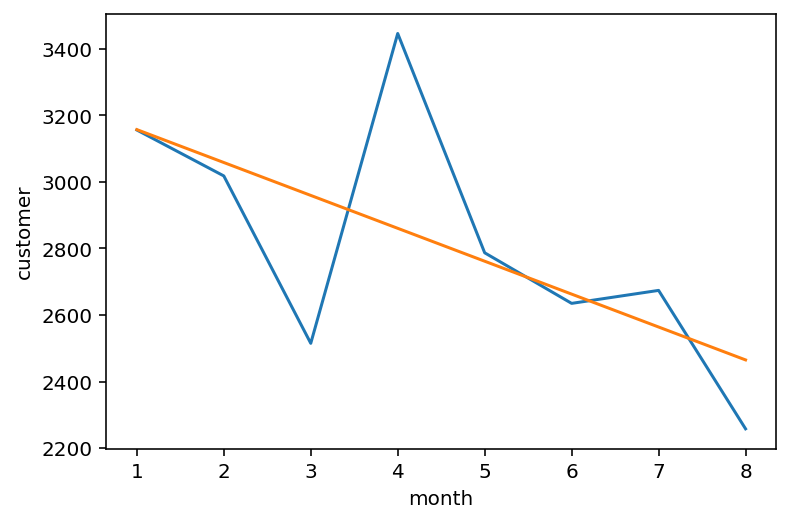

In [577]:

kk = all_data[all_data['Year']==2019]
kk['no.'] = range(1, len(kk)+1)
x = kk['no.'].to_numpy()
x = x[0:8]
y = kk['來客數'].to_numpy().astype(np.int)
y = y[0:8] 
import numpy as np
from matplotlib import pyplot as plt
# 來客數趨勢線

plt.plot(x, y)
plt.xlabel('month')
plt.ylabel('customer')

# Calculate the Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)


plt.plot(x, p(x))

In [572]:
# 至8月平均漲幅
y_diff = 100* np.diff(y)/y[:-1]
y_diff = y_diff[:7]
y_diff = y_diff.sum() / 7
y_diff

-3.239436287435254

In [585]:
100*((2258 - 3156)/3156) / 7

-4.064819844287525

In [582]:
100* (np.diff(y)/y[:-1])

array([ -4.37262357, -16.66666667,  37.01789264, -19.12362159,
        -5.45389307,   1.4800759 , -15.55721765])

In [576]:
# 至10月平均漲幅
y_diff = 100* np.diff(y)/y[:-1]
y_diff = y_diff[:9]
y_diff = y_diff.sum() / 9
y_diff

3.1736806911876587

In [402]:
np.percentile(all_data['來客數'], (25, 50, 75))

array([2449., 2786., 3373.])

In [403]:
np.percentile(all_data['AOV'], (25, 50, 75))

array([2178.5, 2298. , 2392. ])

In [404]:
all_data['AOV'].mean()

2276.31914893617

In [189]:
# 篩選要比較的資料
date = ['2018-09', '2018-10', '2018-11','2019-09', '2019-10', '2019-11'] #想要的值
filt = all_data['Month'].isin(date)
compr_data = all_data.loc[filt, ['Year', 'Month', '營收', '成本', '獲利', '銷量', '來客數', 'AOV', 'GMP']]
compr_data['Month'] = compr_data['Month'].str.split('-', expand = True)[1]
compr_data = compr_data.loc[[32, 44, 33, 45, 34, 46],:]
compr_data.reset_index(drop=True, inplace=True)
compr_data

,Year,Month,營收,成本,獲利,銷量,來客數,AOV,GMP
0,2018,09,5672813,2672049,3000764,6280,2500,2269,52.9
1,2019,09,10567550,4703472,5864077,11119,5075,2082,55.5
2,2018,10,7836798,3792919,4043878,8355,3863,2029,51.6
3,2019,10,2729007,1267781,1461225,3109,1344,2031,53.5
4,2018,11,9478802,4577240,4901562,8207,3937,2408,51.7
5,2019,11,1047369,530050,517319,1329,608,1723,49.4


In [ ]:
# 每月來客數與客單價折線圖
import numpy as np
import matplotlib import pyplot as plt 

x=all_data['Month']
y1=all_data['AOV']                          
y2=all_data['來客數'] 
plt.plot(x,y1)#, label="客單價")
plt.plot(x,y2)#, label="來客數")

plt.title("每月來客數與客單價折線圖",fontsize=20)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.show()

# 製作營收廣告來源表

In [414]:

ad_data_all = pd.read_csv('new_all_data.csv')
ad_data_all = ad_data_all[['系列', '產品', '單價', 'Month', '成本', '獲利', '會員', '廣告代號all']]


In [417]:
ad_data_2019_09  = ad_data_all [ ad_data_all['Month'] == '2019-09' ]
ad_data_2019_09 = ad_data_2019_09.groupby('廣告代號all', as_index=False)['單價', '獲利'].sum()
ad_data_2019_09['佔銷售比'] = round(100*(ad_data_2019_09['單價'] / ad_data_2019_09['單價'].sum()), 1)
ad_data_2019_09['毛利率'] = round(100*(ad_data_2019_09['獲利'] / ad_data_2019_09['單價']), 1)
ad_data_2019_09

C:\Users\chanm\AppData\Local\Temp\ipykernel_21804\1374549537.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,廣告代號all,單價,獲利,佔銷售比,毛利率
0,廣告_B2KDG_MK,41171.060,20597.045,0.4,50.0
1,廣告_B2KDG_MP,64433.005,37267.475,0.6,57.8
2,廣告_B2KDG_P,4741072.595,2671741.555,44.9,56.4
3,廣告_B2KDG_mp,300990.585,169002.365,2.8,56.1
4,廣告_B2KMP_D,6509.265,3553.200,0.1,54.6
5,廣告_B2KMP_P,987.000,329.000,0.0,33.3
6,廣告_B2KP_D,21588.980,11607.120,0.2,53.8
7,廣告_B2K_jqejqe,2122.050,1256.780,0.0,59.2
8,廣告_DMDMP_D,19378.100,11264.960,0.2,58.1
9,廣告_DPPP_D,16907.310,9772.945,0.2,57.8


In [418]:
ad_data_2019_09 = ad_data_2019_09.groupby('廣告代號all', as_index=False)['單價'].sum()
ad_data_2019_09

,廣告代號all,單價
0,廣告_B2KDG_MK,41171.060
1,廣告_B2KDG_MP,64433.005
2,廣告_B2KDG_P,4741072.595
3,廣告_B2KDG_mp,300990.585
4,廣告_B2KMP_D,6509.265
5,廣告_B2KMP_P,987.000
6,廣告_B2KP_D,21588.980
7,廣告_B2K_jqejqe,2122.050
8,廣告_DMDMP_D,19378.100
9,廣告_DPPP_D,16907.310


In [419]:
fig_ad_data_2019_09 = px.pie(ad_data_2019_09, values='單價', names='廣告代號all')#, title='2019-09營收廣告來源')
fig_ad_data_2019_09.update_traces(textposition='inside', textinfo='percent+label')
fig_ad_data_2019_09 .show()

In [420]:
# 2019_10月
ad_data_2019_10  = ad_data_all [ ad_data_all['Month'] == '2019-10' ]
ad_data_2019_10  = ad_data_2019_10 .groupby('廣告代號all', as_index=False)['單價', '獲利'].sum()
ad_data_2019_10 ['佔銷售比'] = round(100*(ad_data_2019_10 ['單價'] / ad_data_2019_10 ['單價'].sum()), 1)
ad_data_2019_10 ['毛利率'] = round(100*(ad_data_2019_10 ['獲利'] / ad_data_2019_10 ['單價']), 1)
ad_data_2019_10 = ad_data_2019_10.groupby('廣告代號all', as_index=False)['單價'].sum()

C:\Users\chanm\AppData\Local\Temp\ipykernel_21804\1123672331.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [421]:
fig_ad_data_2019_10 = px.pie(ad_data_2019_10, values='單價', names='廣告代號all')#, title='2019-10營收廣告來源')
fig_ad_data_2019_10.update_traces(textposition='inside', textinfo='percent+label')
fig_ad_data_2019_10.show()

In [425]:
(3109 - 8355)/8355 

-0.6278874925194494

In [424]:
# 2018_10月
ad_data_2018_10  = ad_data_all [ ad_data_all['Month'] == '2018-10' ]
ad_data_2018_10  = ad_data_2018_10 .groupby('廣告代號all', as_index=False)['單價', '獲利'].sum()
ad_data_2018_10 ['佔銷售比'] = round(100*(ad_data_2018_10 ['單價'] / ad_data_2019_10 ['單價'].sum()), 1)
ad_data_2018_10 ['毛利率'] = round(100*(ad_data_2018_10 ['獲利'] / ad_data_2019_10 ['單價']), 1)
ad_data_2018_10 = ad_data_2018_10.groupby('廣告代號all', as_index=False)['單價'].sum()
fig_ad_data_2018_10 = px.pie(ad_data_2018_10, values='單價', names='廣告代號all')#, title='2019-10營收廣告來源')
fig_ad_data_2018_10.update_traces(textposition='inside', textinfo='percent+label')
fig_ad_data_2018_10.show()

C:\Users\chanm\AppData\Local\Temp\ipykernel_21804\2452572287.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [422]:
ad_data_2019_11  = ad_data_all [ ad_data_all['Month'] == '2019-11' ]
ad_data_2019_11  = ad_data_2019_11.groupby('廣告代號all', as_index=False)['單價', '獲利'].sum()
ad_data_2019_11 ['佔銷售比'] = round(100*(ad_data_2019_11['單價'] /ad_data_2019_11['單價'].sum()), 1)
ad_data_2019_11 ['毛利率'] = round(100*(ad_data_2019_11['獲利'] /ad_data_2019_11['單價']), 1)
ad_data_2019_11 = ad_data_2019_11.groupby('廣告代號all', as_index=False)['單價'].sum()

C:\Users\chanm\AppData\Local\Temp\ipykernel_21804\931055346.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [423]:
fig_ad_data_2019_11 = px.pie(ad_data_2019_11, values='單價', names='廣告代號all')#, title='2019-10營收廣告來源')
fig_ad_data_2019_11.update_traces(textposition='inside', textinfo='percent+label')
fig_ad_data_2019_11.show()